In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [20]:
file = 'stresstest_online_2.63.6_20161206-181821-696.csv'
data = pd.read_csv(file).sort_values(by='StartMillis')
data.head()

,Type,ThreadId,StartMillis,DurationMillis,ResponseSize,ResultType,ExceptionInfo,Pivot
1,Klang1WeganfrageTask,69,4,463,30586,OK,NaN,NaN
81,Klang1WeganfrageTask,71,4,6408,103626,OK,NaN,NaN
187,Klang1WeganfrageTask,68,4,13718,87944,OK,NaN,NaN
45,Klang1WeganfrageTask,70,5,3556,45798,OK,NaN,NaN
28,Klang1WeganfrageTask,66,5,2337,45778,OK,NaN,NaN


# Client-side statistics per Klang

In [17]:
def percentile(n):
    """Percentile wrapper esp. for groupby"""
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [18]:
data.groupby('Type')['DurationMillis'].agg([np.size, np.mean, np.median, percentile(95)]).round({'mean': 1})

,size,mean,median,percentile_95
Type,,,,
Klang1WeganfrageTask,6004,3010.1,711,14259.25
Klang2Task,5504,61.1,42,144.00
Klang3Task,5162,59.5,52,86.00
Klang4Task,5161,228.7,244,412.00
Klang5Task,5155,115.0,104,175.00


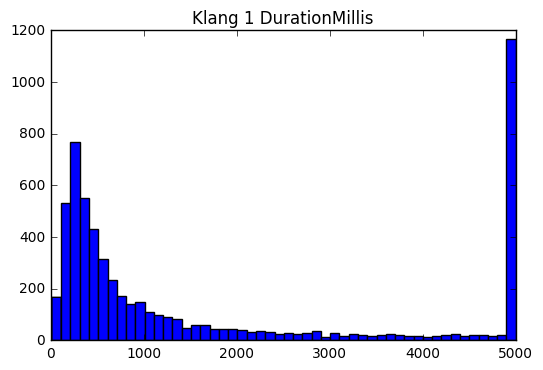

In [61]:
k1 = data[data.Type == 'Klang1WeganfrageTask'].copy()
k1[k1.DurationMillis > 5000] = 5000
plt.title('Klang 1 DurationMillis')
p = plt.hist(k1['DurationMillis'], bins=50)

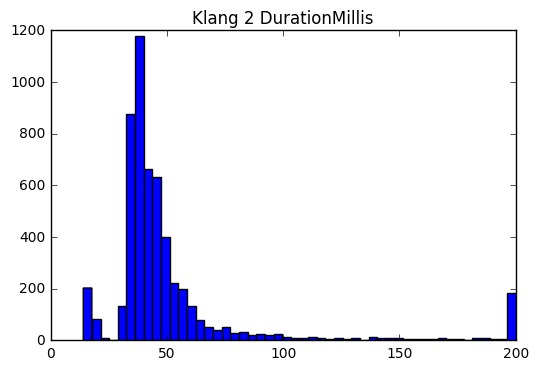

In [59]:
k2 = data[data.Type == 'Klang2Task'].copy()
k2[k2.DurationMillis > 200] = 200
plt.title('Klang 2 DurationMillis')
p = plt.hist(k2['DurationMillis'], bins=50)

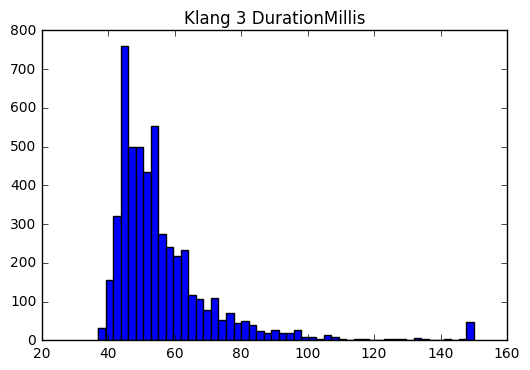

In [72]:
k3 = data[data.Type == 'Klang3Task'].copy()
k3[k3.DurationMillis > 150] = 150
plt.title('Klang 3 DurationMillis')
p = plt.hist(k3['DurationMillis'], bins=50)

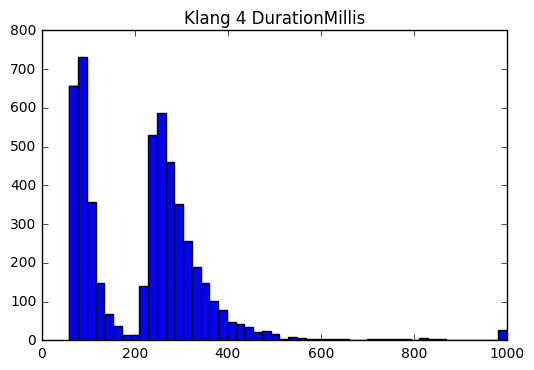

In [69]:
k4 = data[data.Type == 'Klang4Task'].copy()
k4[k4.DurationMillis > 1000] = 1000
plt.title('Klang 4 DurationMillis')
p = plt.hist(k4['DurationMillis'], bins=50)

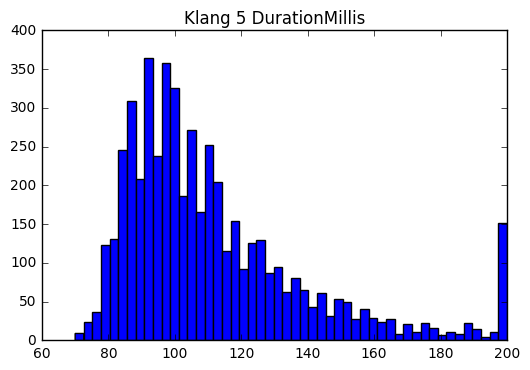

In [68]:
k5 = data[data.Type == 'Klang5Task'].copy()
k5[k5.DurationMillis > 200] = 200
plt.title('Klang 5 DurationMillis')
p = plt.hist(k5['DurationMillis'], bins=50)